# Cog260 Final Project Code - Simple Regressi

In [8]:
data <- read.csv("aoa_crt_sim_assoc_target.csv", header = T)

In [9]:
library(tidyverse)
library(knitr)
library(broom)
library(ggplot2)
#library(UsingR)
#library(ggrepel)
library(car)
library(Matrix)
#library(scatterplot3d)
library(xtable)
#library(MPV)
library(glmnet)
#library(rms)
library(MASS)
library(gridExtra)

In [10]:
data <- data %>% filter(target == 1)

In [11]:

head(data)

,concept_1,concept_2,colexification_count,concepticon_gloss_1,age_of_acquisition_1,concepticon_gloss_2,age_of_acquisition_2,avg_age_acquisition,age_acquisition_diff,Word2Vec_similarity,association,concreteness_diff,concreteness_1,concreteness_2,assoc,target
,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,AFTERNOON,EVENING,17,AFTERNOON,281,EVENING,303,292.0,22,0.7569274,17,33,406,439,15,1
2,AFTERNOON,LUNCH,2,AFTERNOON,281,LUNCH,275,278.0,6,0.6842560,2,146,406,552,11,1
3,AFTERNOON,NIGHT,3,AFTERNOON,281,NIGHT,222,251.5,59,0.6735070,3,90,406,496,11,1
4,AFTERNOON,PIG,2,AFTERNOON,281,PIG,233,257.0,48,0.3619404,2,208,406,614,0,1
5,AFTERNOON,SUN,2,AFTERNOON,281,SUN,181,231.0,100,0.3368215,2,211,406,617,11,1
6,AFTERNOON,WEST,2,AFTERNOON,281,WEST,342,311.5,61,0.4724362,2,51,406,355,0,1


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


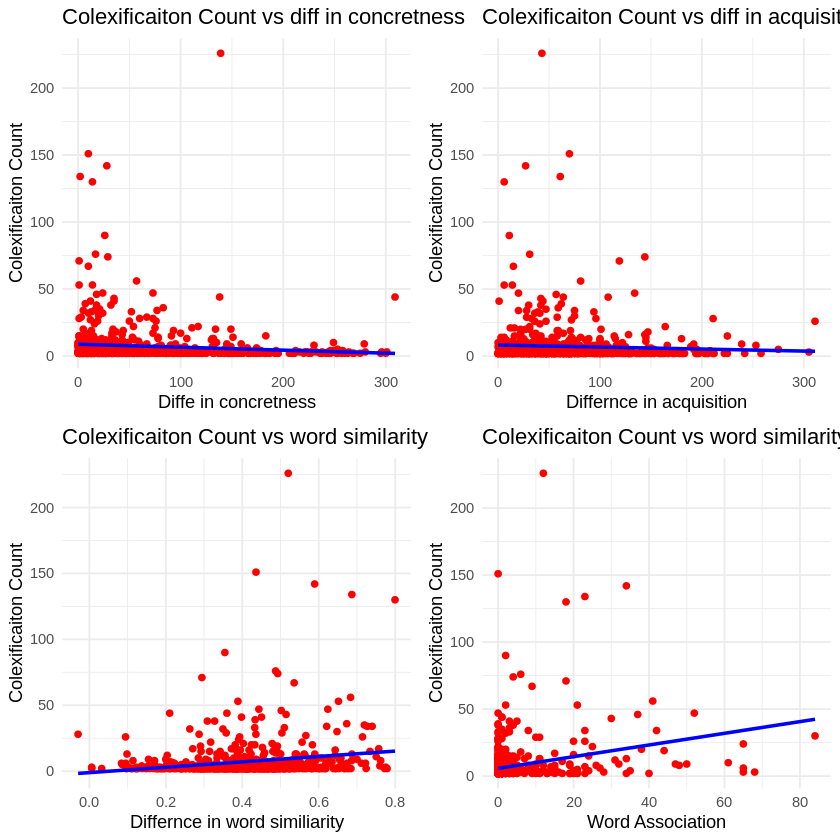

In [12]:
p1 <- ggplot(data, aes(x=concreteness_diff, y=colexification_count)) + geom_point(col = 'red')+ scale_color_brewer(palette="Dark2") + theme_minimal() +
  geom_smooth(method=lm, se=FALSE, col = "blue") + ggtitle("Colexificaiton Count vs diff in concretness") +
			  xlab("Diffe in concretness") + ylab("Colexificaiton Count")

p2 <- ggplot(data, aes(x=age_acquisition_diff, y= colexification_count)) + geom_point(col = 'red')+ scale_color_brewer(palette="Dark2") + theme_minimal() +
  geom_smooth(method=lm, se=FALSE, col = "blue") + ggtitle("Colexificaiton Count vs diff in acquisition") +
			  xlab("Differnce in acquisition") + ylab("Colexificaiton Count")

p3 <- ggplot(data, aes(x=Word2Vec_similarity, y=colexification_count)) + geom_point(col = 'red')+ scale_color_brewer(palette="Dark2") + theme_minimal() +
  geom_smooth(method=lm, se=FALSE, col = "blue") + ggtitle("Colexificaiton Count vs word similarity") +
			  xlab("Differnce in word similiarity") + ylab("Colexificaiton Count")

p4 <- ggplot(data, aes(x=assoc, y=colexification_count)) + geom_point(col = 'red')+ scale_color_brewer(palette="Dark2") + theme_minimal() +
  geom_smooth(method=lm, se=FALSE, col = "blue") + ggtitle("Colexificaiton Count vs word similarity") +
			  xlab("Word Association") + ylab("Colexificaiton Count")

grid.arrange(p1,p2,p3,p4)

In [13]:
# qqnorm(data$concreteness_diff)
# pl1 <- qqline(data$concreteness_diff, col = "blue")

# qqnorm(data$age_acquisition_diff)
#  pl2 <- qqline(data$age_acquisition_diff, col = "blue")

# qqnorm(data$Word2Vec_similarity)
# pl3 <- qqline(data$Word2Vec_similarity, col = "blue")

# qqnorm(data$assoc)
# pl4 <- qqline(data$assoc, col = "blue")

# qqnorm(data$colexification_count)
# pl5 <- qqline(data$colexification_count, col = "blue")

# #grid.arrange(pl1,pl2,pl3,pl4, pl5, col = 2)

## Simple Linear Regression

In [14]:
model <- lm(colexification_count ~ age_acquisition_diff, data = data)
summary(model)

model %>%
  tidy() %>%
  kable(caption = "The Simple Linear Regression of Age of Aquisition differnece and colexification count")


Call:
lm(formula = colexification_count ~ age_acquisition_diff, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -6.242  -5.297  -4.209  -1.652 218.403 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           8.24205    0.95304   8.648   <2e-16 ***
age_acquisition_diff -0.01501    0.01108  -1.354    0.176    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.11 on 726 degrees of freedom
Multiple R-squared:  0.002519,	Adjusted R-squared:  0.001145 
F-statistic: 1.834 on 1 and 726 DF,  p-value: 0.1761




Table: The Simple Linear Regression of Age of Aquisition differnece and colexification count

|term                 |   estimate| std.error| statistic|   p.value|
|:--------------------|----------:|---------:|---------:|---------:|
|(Intercept)          |  8.2420450| 0.9530401|  8.648162| 0.0000000|
|age_acquisition_diff | -0.0150074| 0.0110828| -1.354113| 0.1761216|

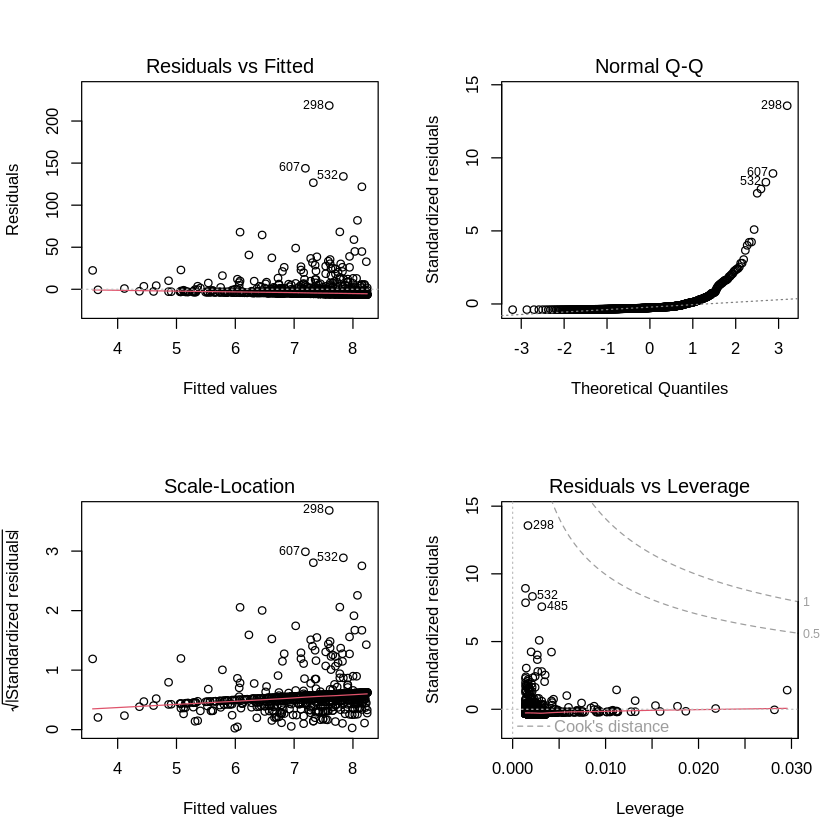

In [15]:
par(mfrow=c(2,2))
plot(model)

### Simple Linear Regression Box Cox Transformation

In [39]:
boxcox_result <- boxcox(model, plotit = FALSE)
lambda <- boxcox_result$x[which.max(boxcox_result$y)]
lambda
y_transformed <- (data$colexification_count^lambda - 1) / lambda

[1] -1

In [37]:
model_transformed <- lm(y_transformed ~ age_acquisition_diff, data = data)
model_transformed


Call:
lm(formula = y_transformed ~ age_acquisition_diff, data = data)

Coefficients:
         (Intercept)  age_acquisition_diff  
           6.693e-01            -8.728e-05  


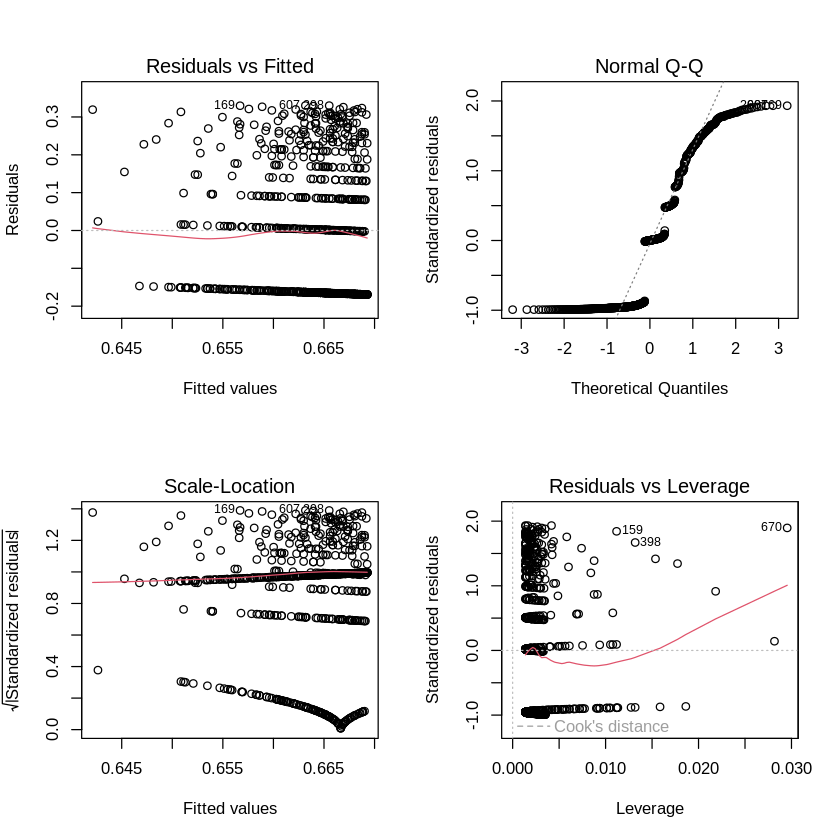

In [38]:
par(mfrow=c(2,2))
plot(model_transformed)

## Multiple Regression

In [20]:
model2 <- lm(colexification_count ~ Word2Vec_similarity + age_acquisition_diff + concreteness_diff + assoc, data = data)
summary(model2)

model2 %>%
  tidy() %>%
  kable(caption = "The Multiple Linear Regression of Age of Aquisition difference,\n concretness differences, word similarity and word association \n vs colexification count")


Call:
lm(formula = colexification_count ~ Word2Vec_similarity + age_acquisition_diff + 
    concreteness_diff + assoc, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.664  -4.562  -2.714  -0.387 214.509 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.729791   2.213392   0.782  0.43476    
Word2Vec_similarity  13.660406   4.402414   3.103  0.00199 ** 
age_acquisition_diff -0.008537   0.010735  -0.795  0.42673    
concreteness_diff    -0.011418   0.008452  -1.351  0.17713    
assoc                 0.384033   0.061861   6.208 9.04e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.47 on 723 degrees of freedom
Multiple R-squared:  0.08416,	Adjusted R-squared:  0.07909 
F-statistic: 16.61 on 4 and 723 DF,  p-value: 4.959e-13




Table: The Multiple Linear Regression of Age of Aquisition difference,
 concretness differences, word similarity and word association 
 vs colexification count

|term                 |   estimate| std.error|  statistic|   p.value|
|:--------------------|----------:|---------:|----------:|---------:|
|(Intercept)          |  1.7297906| 2.2133917|  0.7815113| 0.4347577|
|Word2Vec_similarity  | 13.6604056| 4.4024138|  3.1029354| 0.0019907|
|age_acquisition_diff | -0.0085366| 0.0107345| -0.7952424| 0.4267335|
|concreteness_diff    | -0.0114179| 0.0084517| -1.3509628| 0.1771300|
|assoc                |  0.3840326| 0.0618606|  6.2080355| 0.0000000|

In [21]:
vif(model2)

Word2Vec_similarity age_acquisition_diff    concreteness_diff 
            1.073147             1.017545             1.030140 
               assoc 
            1.056566

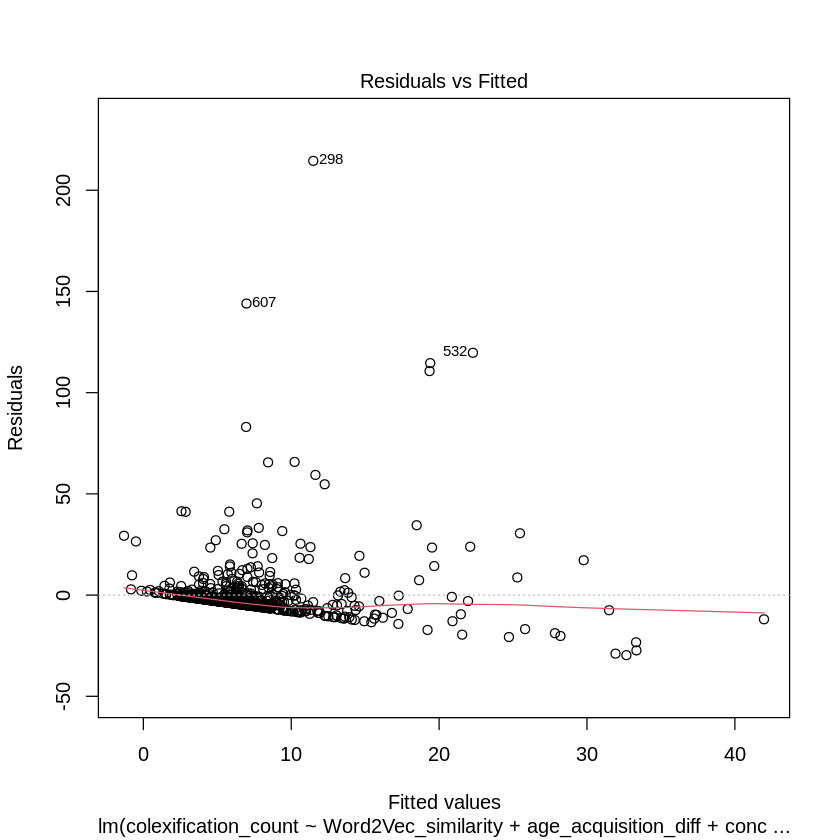

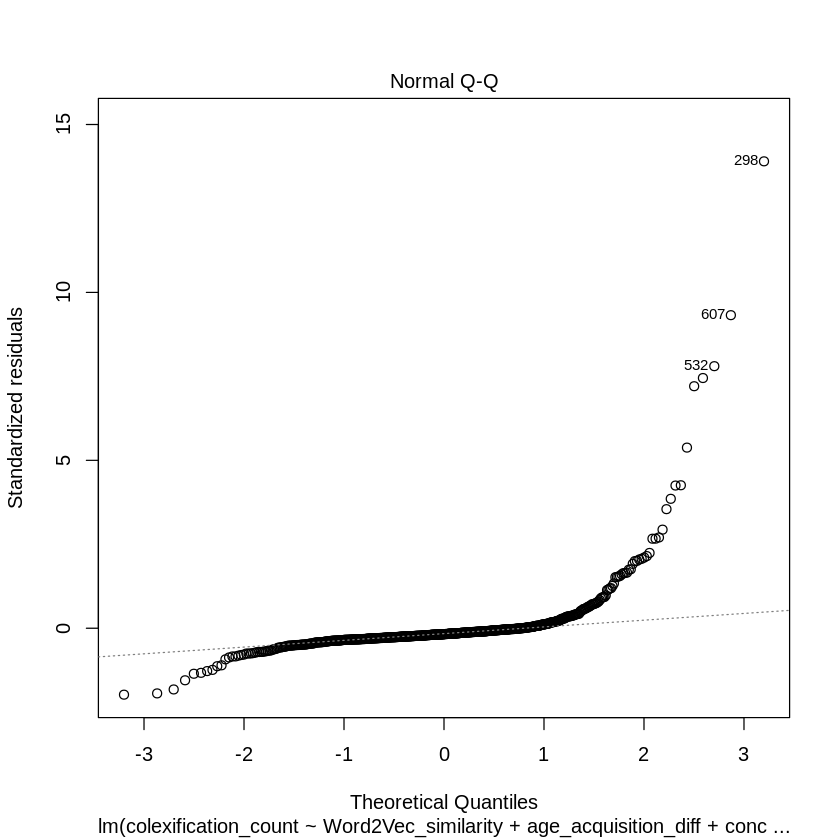

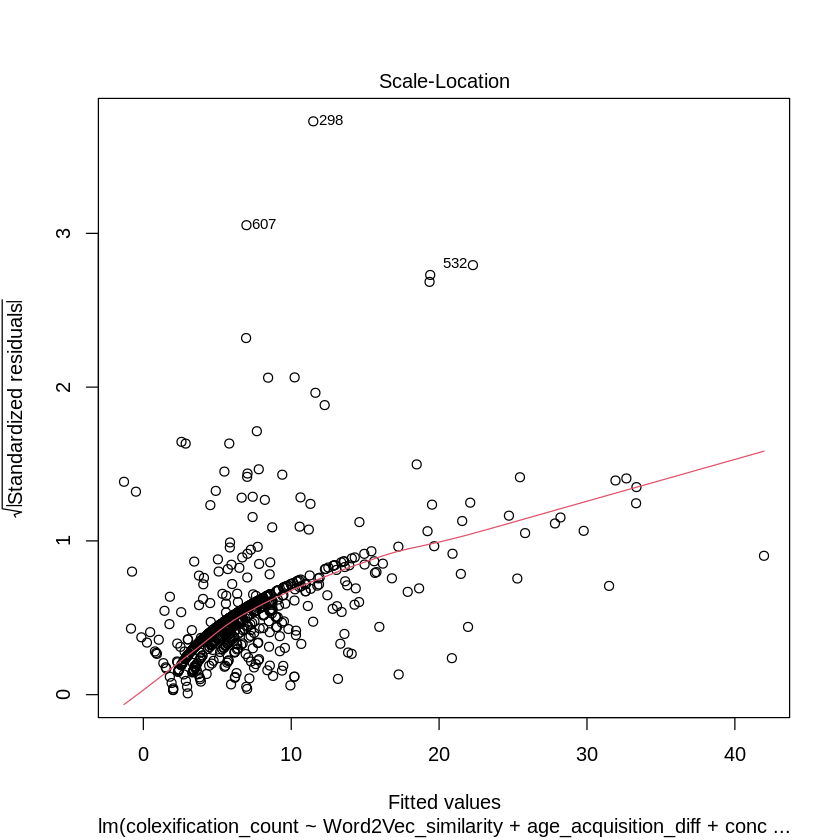

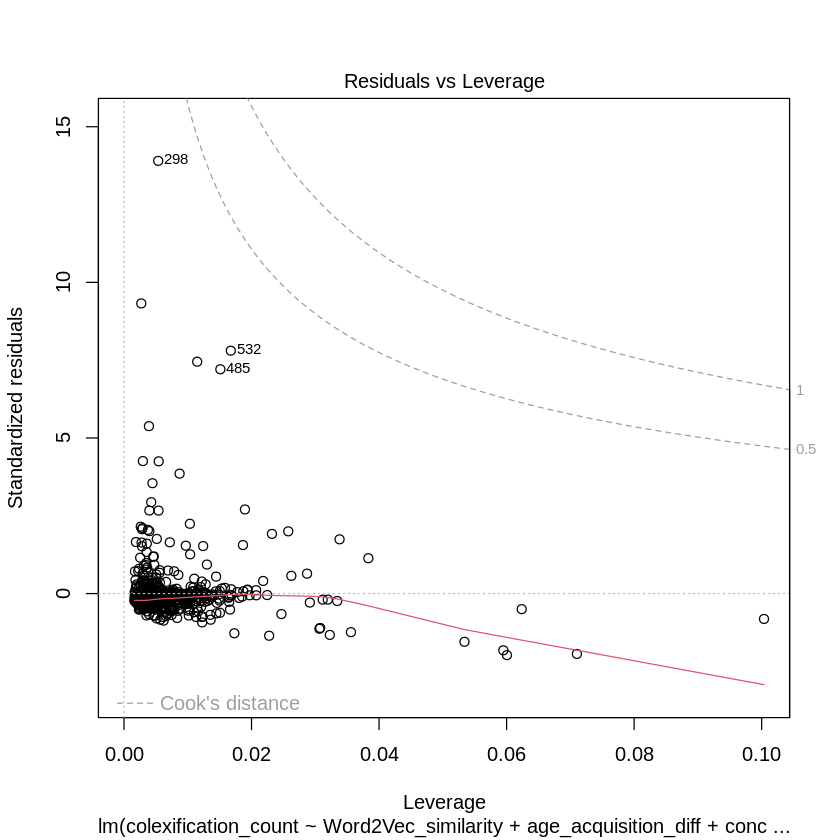

In [22]:
plot(model2)

In [23]:
shapiro.test(residuals(model2))


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.41732, p-value < 2.2e-16


Optimal lambda for Box-Cox transformation: -0.9494949 


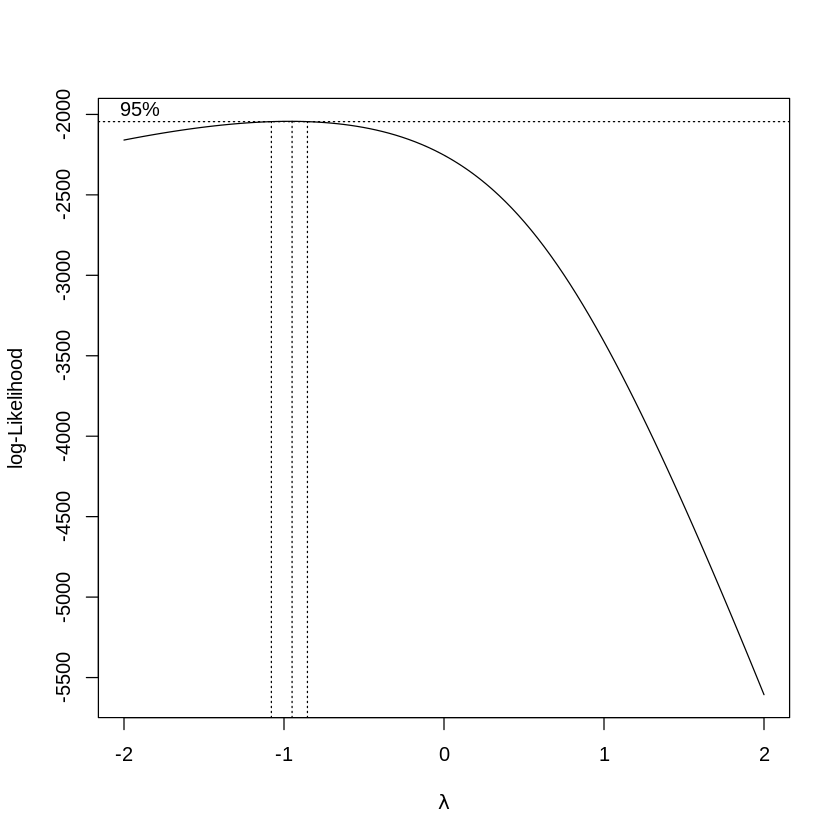

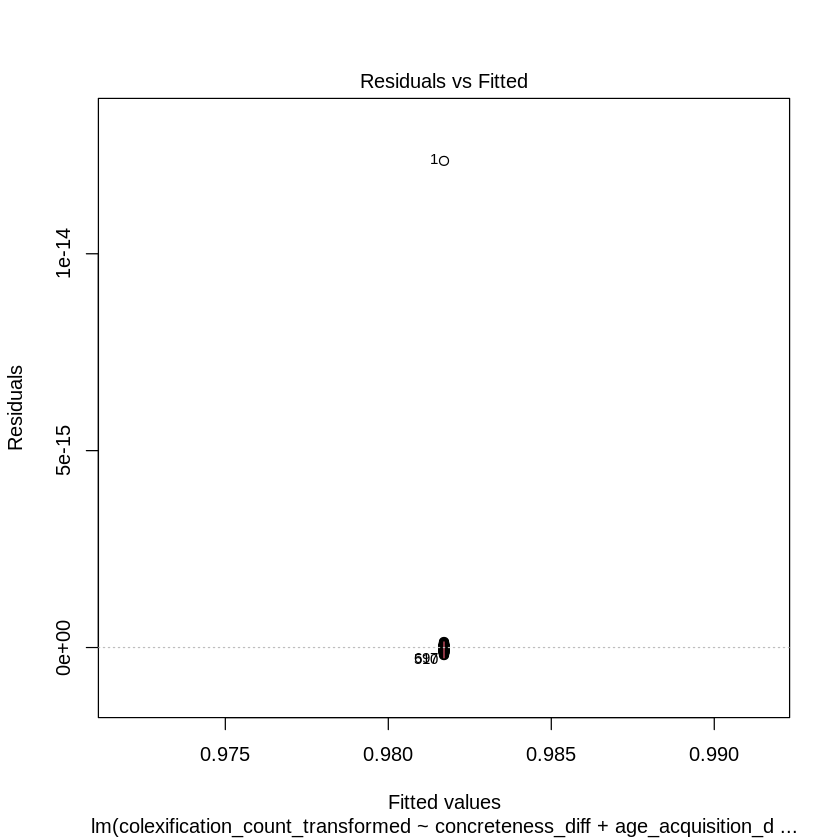

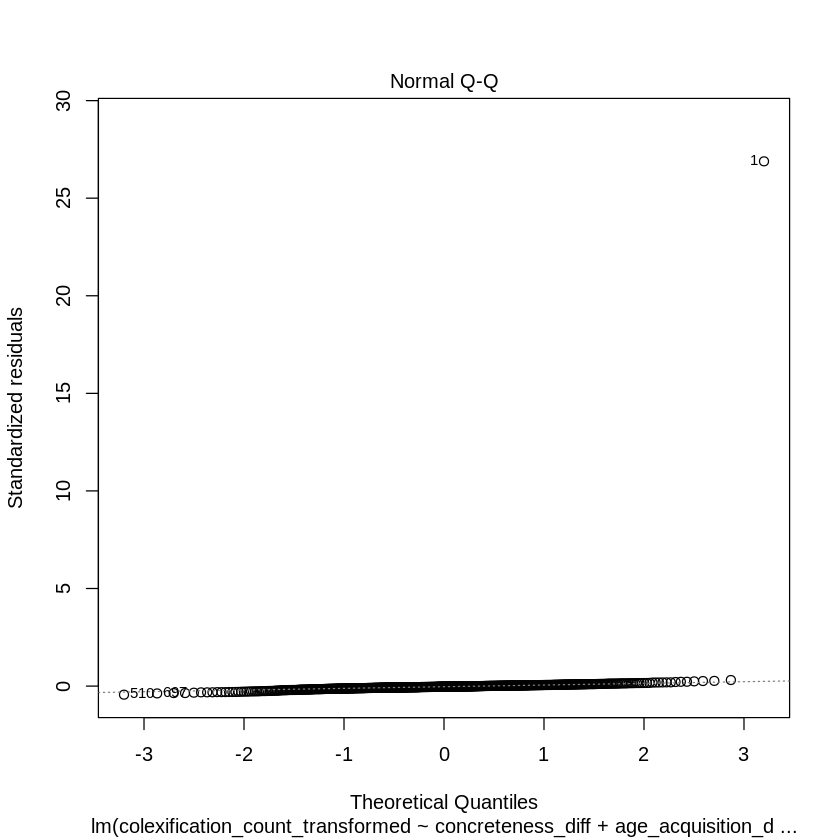

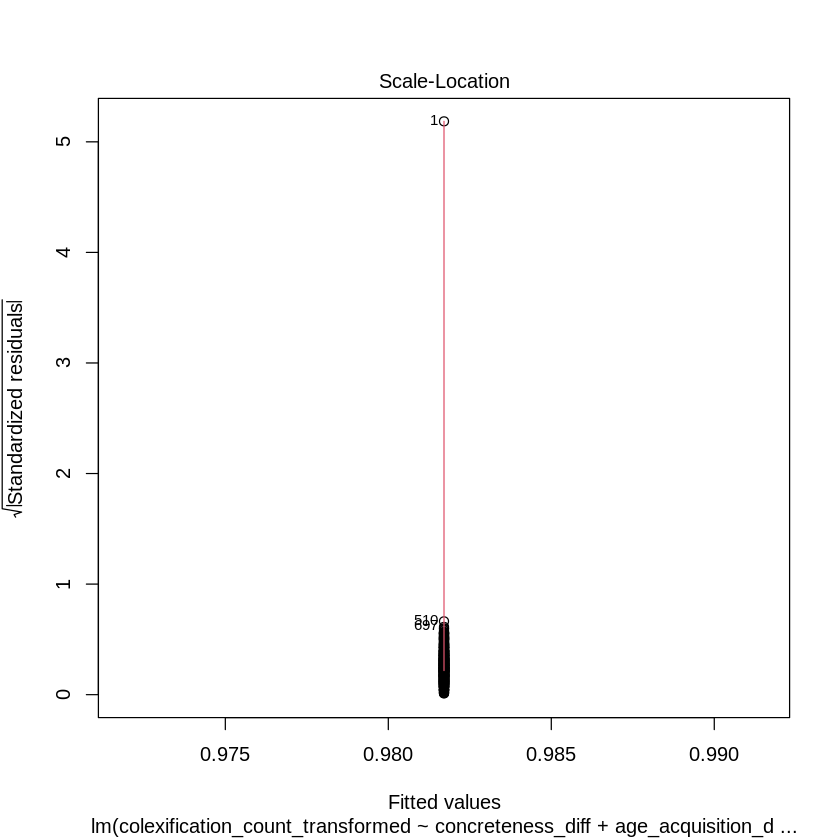

Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


concreteness_diff age_acquisition_diff  Word2Vec_similarity 
            1.030140             1.017545             1.073147 
               assoc 
            1.056566


	Shapiro-Wilk normality test

data:  residuals(model_transformed)
W = 0.049909, p-value < 2.2e-16


Warning message in summary.lm(model_transformed):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = colexification_count_transformed ~ concreteness_diff + 
    age_acquisition_diff + Word2Vec_similarity + assoc, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.930e-16 -4.150e-17 -1.430e-17  1.170e-17  1.236e-14 

Coefficients:
                       Estimate Std. Error    t value Pr(>|t|)    
(Intercept)           9.817e-01  6.615e-17  1.484e+16   <2e-16 ***
concreteness_diff    -2.230e-20  2.526e-19 -8.800e-02   0.9297    
age_acquisition_diff -1.636e-19  3.208e-19 -5.100e-01   0.6103    
Word2Vec_similarity   2.992e-16  1.316e-16  2.274e+00   0.0233 *  
assoc                 1.293e-18  1.849e-18  6.990e-01   0.4846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.623e-16 on 723 degrees of freedom
Multiple R-squared:  0.499,	Adjusted R-squared:  0.4962 
F-statistic:   180 on 4 and 723 DF,  p-value: < 2.2e-16


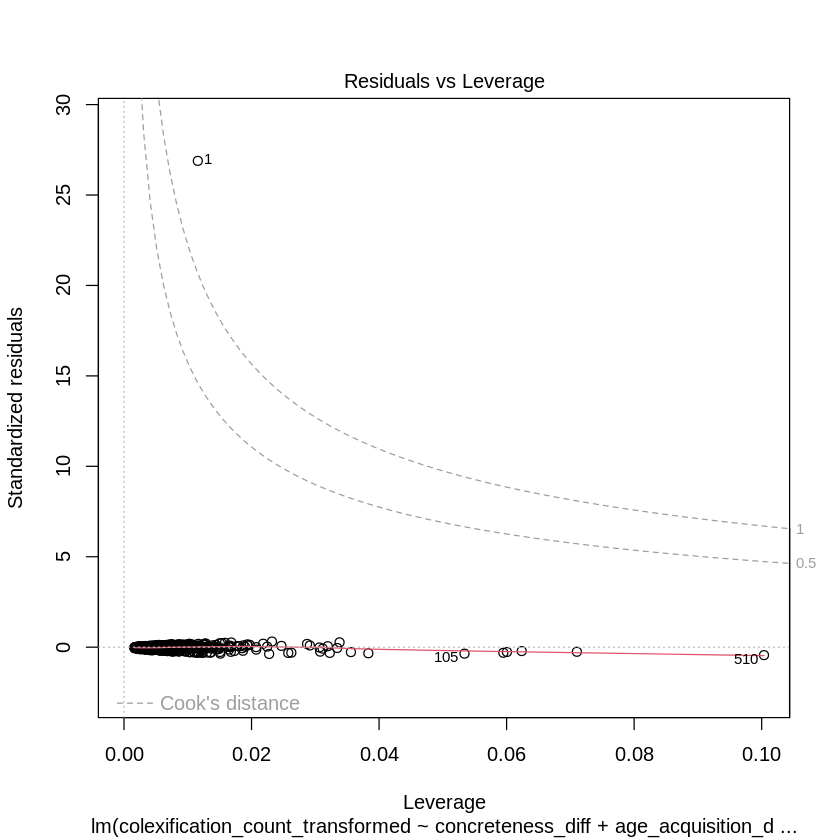

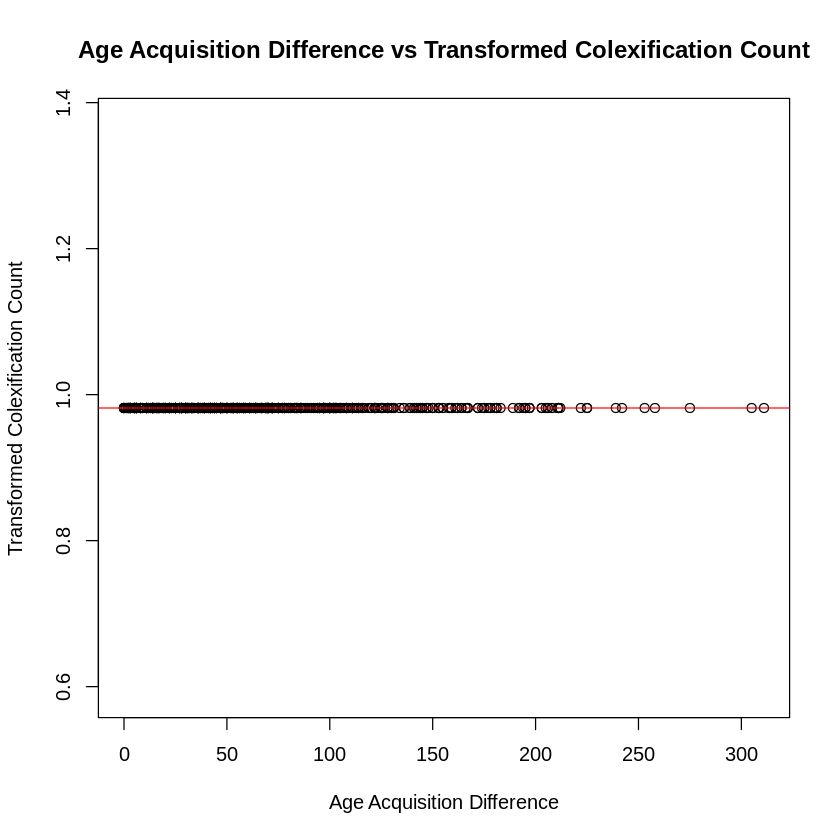

In [24]:
bc <- boxcox(lm(colexification_count ~ concreteness_diff + age_acquisition_diff + Word2Vec_similarity + assoc, data = data))

# Extracting the lambda value
lambda_optimal <- bc$x[which.max(bc$y)]
cat("Optimal lambda for Box-Cox transformation:", lambda_optimal, "\n")

# Applying the Box-Cox transformation
data$colexification_count_transformed <- ifelse(lambda_optimal == 0, log(data$colexification_count), (data$colexification_count^lambda_optimal - 1) / lambda_optimal)

# Multiple Regression Model with Transformed Variable
model_transformed <- lm(colexification_count_transformed ~ concreteness_diff + age_acquisition_diff + Word2Vec_similarity + assoc, data = data)

# Checking for assumptions on the transformed model

# Linearity and Homoscedasticity
plot(model_transformed)

# Independence (Check for Multicollinearity)
vif(model_transformed)

# Normality of Residuals
shapiro.test(residuals(model_transformed))

# Model Summary
summary(model_transformed)

# Investigating the relationship between age_acquisition_diff and transformed colexification_count
plot(data$age_acquisition_diff, data$colexification_count_transformed, main="Age Acquisition Difference vs Transformed Colexification Count", xlab="Age Acquisition Difference", ylab="Transformed Colexification Count")
abline(lm(colexification_count_transformed ~ age_acquisition_diff, data = data), col="red")

In [25]:
summary(model_transformed)

Warning message in summary.lm(model_transformed):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = colexification_count_transformed ~ concreteness_diff + 
    age_acquisition_diff + Word2Vec_similarity + assoc, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.930e-16 -4.150e-17 -1.430e-17  1.170e-17  1.236e-14 

Coefficients:
                       Estimate Std. Error    t value Pr(>|t|)    
(Intercept)           9.817e-01  6.615e-17  1.484e+16   <2e-16 ***
concreteness_diff    -2.230e-20  2.526e-19 -8.800e-02   0.9297    
age_acquisition_diff -1.636e-19  3.208e-19 -5.100e-01   0.6103    
Word2Vec_similarity   2.992e-16  1.316e-16  2.274e+00   0.0233 *  
assoc                 1.293e-18  1.849e-18  6.990e-01   0.4846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.623e-16 on 723 degrees of freedom
Multiple R-squared:  0.499,	Adjusted R-squared:  0.4962 
F-statistic:   180 on 4 and 723 DF,  p-value: < 2.2e-16


## Stepwise Function

In [31]:
step <- stepAIC(model_transformed, trace = TRUE, direction= "both")

Start:  AIC=-51406.74
colexification_count_transformed ~ concreteness_diff + age_acquisition_diff + 
    Word2Vec_similarity + assoc



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                       Df  Sum of Sq        RSS    AIC
- concreteness_diff     1 1.6700e-33 1.5454e-28 -51409
- age_acquisition_diff  1 5.5570e-32 1.5460e-28 -51408
- assoc                 1 1.0454e-31 1.5465e-28 -51408
<none>                               1.5454e-28 -51407
- Word2Vec_similarity   1 1.1053e-30 1.5565e-28 -51404

Step:  AIC=-51408.73
colexification_count_transformed ~ age_acquisition_diff + Word2Vec_similarity + 
    assoc



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                       Df  Sum of Sq        RSS    AIC
- age_acquisition_diff  1 5.5560e-32 1.5460e-28 -51410
- assoc                 1 1.0884e-31 1.5465e-28 -51410
<none>                               1.5454e-28 -51409
+ concreteness_diff     1 1.6700e-33 1.5454e-28 -51407
- Word2Vec_similarity   1 1.1271e-30 1.5567e-28 -51405

Step:  AIC=-51410.47
colexification_count_transformed ~ Word2Vec_similarity + assoc



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                       Df  Sum of Sq        RSS    AIC
- assoc                 1 1.0865e-31 1.5471e-28 -51412
<none>                               1.5460e-28 -51410
+ age_acquisition_diff  1 5.5560e-32 1.5454e-28 -51409
+ concreteness_diff     1 1.6500e-33 1.5460e-28 -51408
- Word2Vec_similarity   1 1.2126e-30 1.5581e-28 -51407

Step:  AIC=-51411.95
colexification_count_transformed ~ Word2Vec_similarity



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                       Df  Sum of Sq        RSS    AIC
<none>                               1.5471e-28 -51412
+ assoc                 1 1.0865e-31 1.5460e-28 -51410
+ age_acquisition_diff  1 5.5370e-32 1.5465e-28 -51410
+ concreteness_diff     1 5.9300e-33 1.5470e-28 -51410
- Word2Vec_similarity   1 1.4248e-30 1.5613e-28 -51407


In [32]:
step %>%
  tidy() %>%
  kable(caption = "Stepwise with AIC on Multiple Regression Model")

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”




Table: Stepwise with AIC on Multiple Regression Model

|term                |  estimate| std.error|    statistic|   p.value|
|:-------------------|---------:|---------:|------------:|---------:|
|(Intercept)         | 0.9817086|         0| 1.798206e+16| 0.0000000|
|Word2Vec_similarity | 0.0000000|         0| 2.585751e+00| 0.0099104|